In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
img_ = cv2.imread('sample_image.jpg')

In [8]:
def drawImg(img,title='Image'):
    plt.imshow(img)
    plt.axis('off')
    plt.title(title+str(img.shape))
    plt.show()

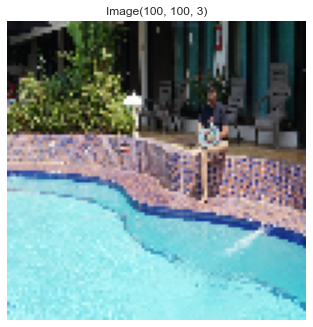

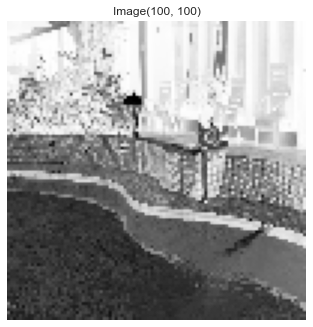

In [17]:
plt.style.use('seaborn')
# img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_ = cv2.resize(img_,(100,100))
img_gray = cv2.cvtColor(img_,cv2.COLOR_RGB2GRAY)
drawImg(img_)
drawImg(img_gray)

In [ ]:
# Color is also a factor in recognition

In [ ]:
# Hardcoded filters
## -->

In [22]:
def convolution(img,img_filter):
    H, W = img.shape[1], img.shape[0]

    F = img_filter.shape[0]  # Assume = 3
    new_img = np.zeros((W-F+1,W-F+1))

    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]

                if new_img[row][col]>255:
                    new_img[row][col] = 255
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0

    return new_img


In [23]:
blur_filter = np.ones((3,3))/9.0

In [24]:
output1 = convolution(img_gray,blur_filter)

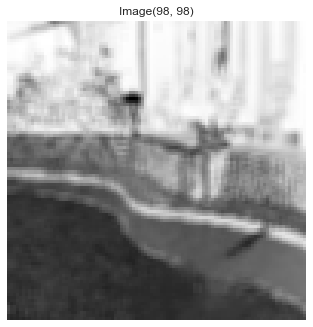

In [25]:
drawImg(output1)

In [26]:
edge_filter = np.array(([1,0,-1],
                        [1,0,-1],
                        [1,0,-1]))

In [27]:
output2 = convolution(img_gray,edge_filter)

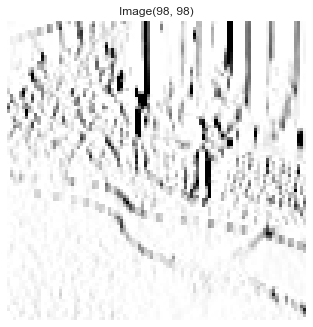

In [28]:
drawImg(output2)

### Extracting features of image using filters


### Buzzwords in CNN
- Convolution layer
- Valid vs. Same Convolution
- Padding
- Stride
- Filters/Kernels/Template
- Pooling (Average / Max-pooling)

### Padding
- Using numpy

In [42]:
img_pad = np.pad(img_,((10,10),(20,20),(0,0)),'constant',constant_values=200)
#pad_width = (rows,columns,channel)

In [43]:
img_.shape, img_pad.shape

((100, 100, 3), (120, 140, 3))

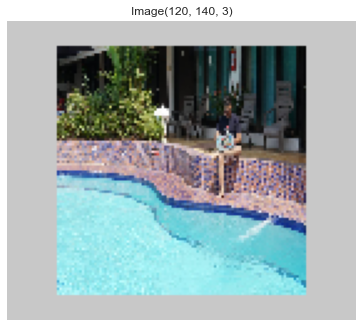

In [44]:
# Padded Image
drawImg(img_pad)

## Stride
- No. of pixels skip each time is called stride

## Pooling - Max and Average
- Implementing Pooling operations

In [48]:
X = np.array([[1,0,2,3],[4,6,6,8],[3,1,1,0],[1,2,2,4]])

In [55]:
def pooling(X,mode='max'):
    stride = 2
    f = 2
    H, W = X.shape
    HO = int(((H-f)/stride)+1)
    WO = int(((W-f)/stride)+1)
    # Assume 0 padding
    pool = np.zeros((HO,WO))

    for row in range(HO):
        for col in range(WO):
            r_start = row*stride
            r_end = r_start + f
            c_start = col*stride
            c_end = c_start + f
            if mode == 'max':
                pool[row][col] = np.max(X[r_start:r_end,c_start:c_end])
            else:
                pool[row][col] = np.average(X[r_start:r_end,c_start:c_end])
    return pool.astype('uint8')

In [58]:
pooling(X)

array([[6, 8],
       [3, 4]], dtype=uint8)

## Dropout
- Regularisation Method
- Reduces Over-fitting